#Transfer Learning 

Very Close to Working hopefully!

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install tensorflow_hub
import tensorflow_hub as hub

import itertools

tf.random.set_seed(1)


Loading the Data

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train = X_train[:10000]

In [7]:
IMAGE_SHAPE = (224,224)

In [8]:
X_train.shape[0]

10000

Reshaping the data so it is easier to work with

In [9]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#Normalizing the pixels
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_img = tf.image.resize(X_train, IMAGE_SHAPE)
X_train_img = tf.image.grayscale_to_rgb(X_train_img)
#X_train_resized[] = X_train_img

In [11]:
X_train_img.shape

TensorShape([10000, 224, 224, 3])

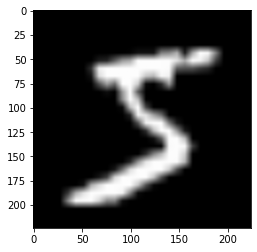

In [12]:
plt.imshow(X_train_img[0])

In [13]:
y_train = y_train[:20000]
y_train.shape

(20000,)

In [14]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(10, activation='softmax')
])
m.build([None, 224, 224, 3])  # Batch input shape.

OSError: SavedModel file does not exist at: /var/folders/3z/4kg16nq52rbg6wd00hw5_hlr0000gn/T/tfhub_modules/bac7ac3188f04e16775f615fb36c0a31f51c4d06/{saved_model.pbtxt|saved_model.pb}

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

m.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history = m.fit(X_train_img,y_train, epochs=10, validation_split=0.3)

NameError: name 'm' is not defined

In [ ]:
def plot_history(history, epochs):
  epochs = range(epochs)

  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.figure(figsize=(12, 8))
  plt.plot(epochs, train_acc, color='blue', label='Training accuracy')
  plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
  plt.legend()
  plt.grid()

In [ ]:
plot_history(history, 10)